# Entendendo Redes Neurais

## Conceitos

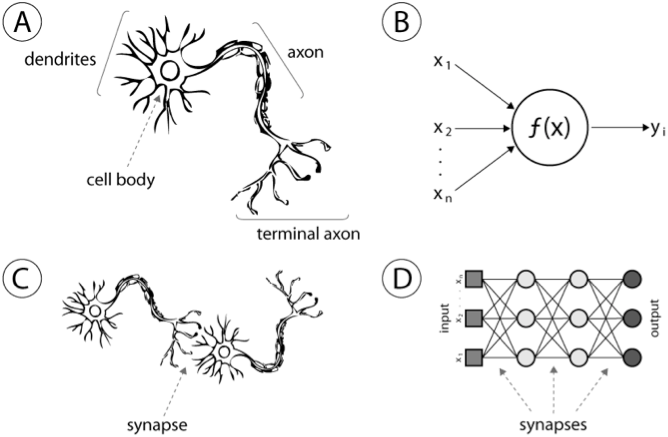

As [redes neurais artificiais](https://pt.wikipedia.org/wiki/Rede_neural_artificial) surgiram nos anos 50 e consistem basicamente num modelo matemático que visa simular as redes neurais dos sistemas nervosos dos seres vivos por meio de algoritmos, elas são compostas por células chamadas [neurônios](https://pt.wikipedia.org/wiki/Neur%C3%B3nio).

Os neurônios se conectam uns aos outros e se comunicam por meio das sinapses que permitem a transmissão de impulsos elétricos entre eles para envio e recebimento de informação.

A versão artificial, que não consegue ser tão complexa ainda, pode ser desenvolvida em um computador com o auxílio de uma linguagem de programação e pode ter diversas aplicações como: detectar fraude em cartão de crédito, interpretar imagens, reconhecimento facial, reconhecimento de sons, fazer previsões no mercado de ações, etc.

### Arquitetura básica de uma Rede Neural Artificial

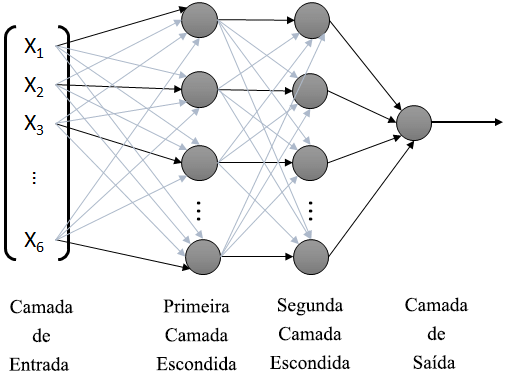

Neurônios (*Neurons*): resultado da soma ponderada pelos pesos dos valores de entrada da camada anterior com a adição do viés no fim;

Pesos (*Weights*): cada entrada em uma rede neural é multiplicada por um peso para indicar sua importância na determinação da saída, eles funcionam como [coeficiente angular](https://pt.wikipedia.org/wiki/Declive) da equação que irá passar pela função de ativação do neurônio;

Vieses (*Bias*): o viés é análogo ao coeficiente linear de uma equação, seu papel é permitir o deslocamento paralelo da função de ativação visando minimizar o erro.

<br>

**Camada de Entrada:** onde os dados entram para iniciar o algoritmo;

**Camadas Escondidas ou Ocultas:** o número de camadas ocultas pode ser maior ou igual a zero, aqui realiza-se a maior parte dos cálculos para refinamento do aprendizado com as características apresentadas na camada de entrada;

**Camada de Saída:** como pode-se deduzir, trata-se da camada que retornará o resultado encontrado pelo algoritmo da rede neural artificial.


### Processo de aprendizado

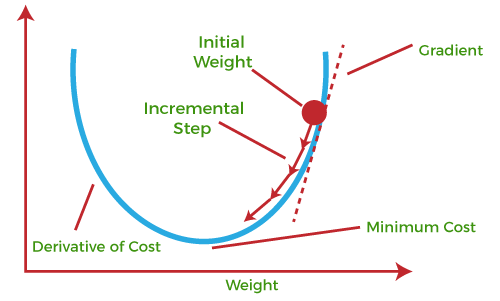

O melhor da rede neural é a sua capacidade de "aprendizado", que consiste basicamente na ação de ajustar os seus pesos e vieses através de um processo iterativo até que a rede consiga uma solução generalizada para o problema que lhe foi apresentado.

<br>

Os tipos de aprendizado são:

[**Aprendizado Supervisionado:**](https://pt.wikipedia.org/wiki/Aprendizagem_supervisionada) quando é mostrada à rede a resposta que queremos que ela forneça;

**Aprendizado Não Supervisionado:** ao contrário do supervisionado, não há indicação da resposta pretendida.

<br>

O algoritmo para o treinamento da rede neural é o seguinte:

(1) Iniciar os pesos (w) e vieses (b) com valores aleatórios;

(2) Executar o algoritmo de [*feedforward*](https://en.wikipedia.org/wiki/Feedforward_neural_network) para alimentar a rede;

(3) Se o erro entre o resultado e a resposta pretendida for satisfatoriamente pequeno o treinamento terminou, senão:

(4) Executar o algoritmo de [*backpropagation*](https://en.wikipedia.org/wiki/Backpropagation) para retropropagar o erro ajustando os pesos e vieses;

(5) Voltar ao passo (2).

## Implementação

**Forward propagation**

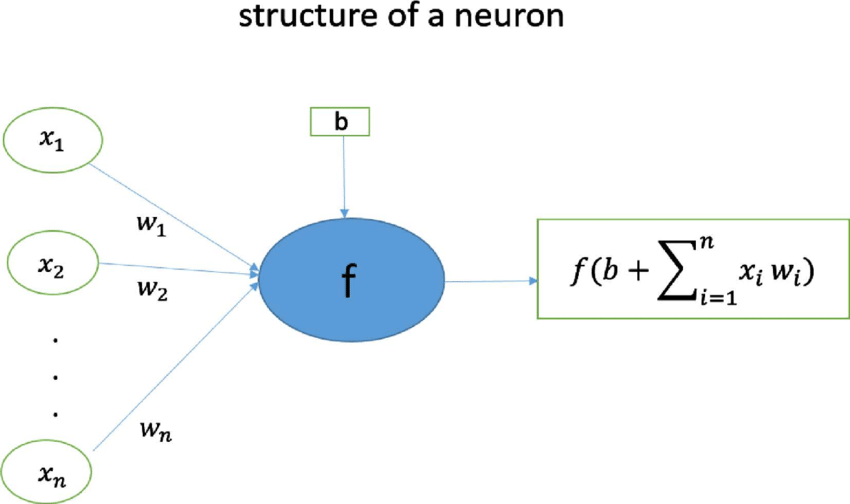

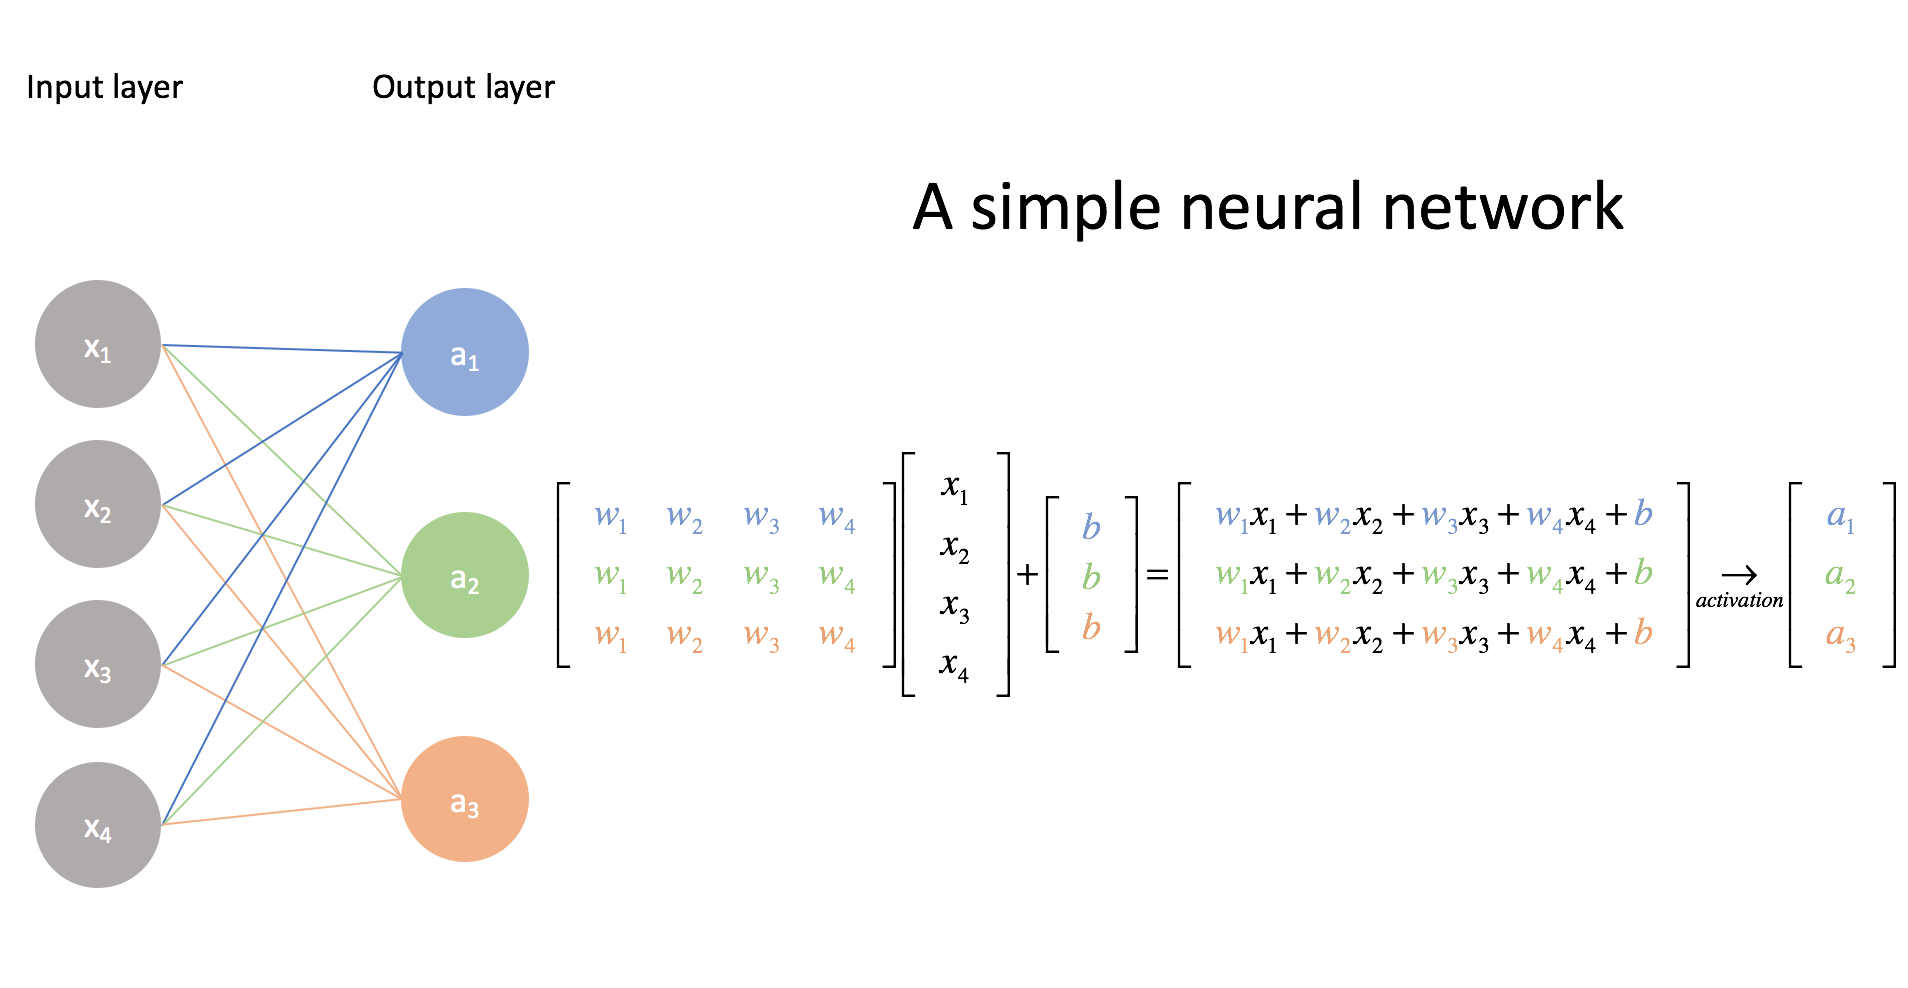

[Multiplicação de matrizes](http://matrixmultiplication.xyz/)

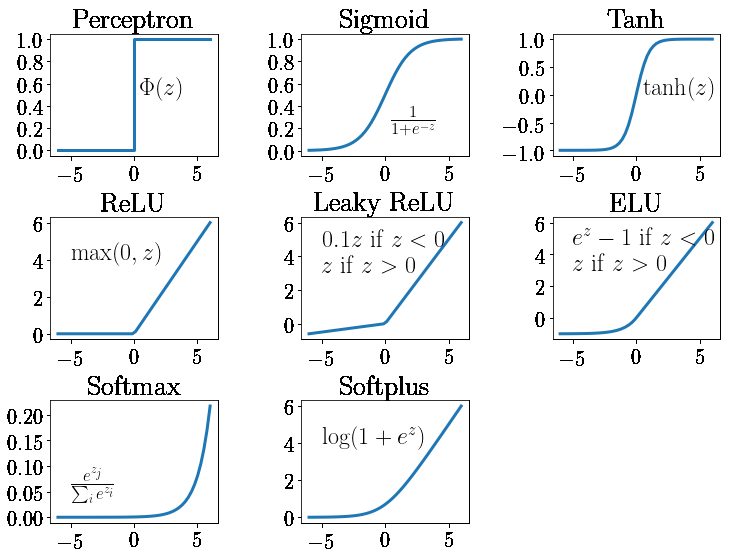

**Fórmulas e Arquitetura:**

$$ Z^{[1]} = W^{[1]} \cdot X + B^{[1]} $$

$$ A^{[1]} = ReLU(Z^{[1]}) $$

$$ Z^{[2]} = W^{[2]} \cdot A^{[1]} + B^{[2]} $$

$$ A^{[2]} = softmax(Z^{[2]}) $$

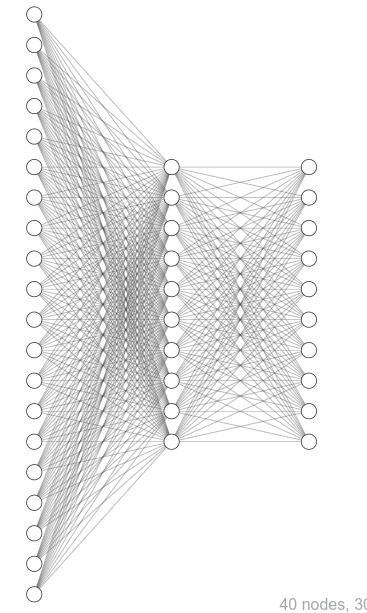

In [68]:
# Exemplo de aplicação de rede neural
# "Reconhecedor de Dígitos" (Digit Recognizer)
# Dados para treinamento: https://www.kaggle.com/c/digit-recognizer/data?select=train.csv
#---------------------------------------------------------------------------------------------
# Dimensões:
# Entrada imagem 28x28 = 784 pixels = 784 neurônios, camada oculta e saída 10 neurônios
# A0 = X : 784 x m
# Z1 ∼ A1: 10 x m
# W1: 10 x 784
# B1: 10 x 1
# Z2 ∼ A2: 10 x m
# W2: 10 x 10
# B2: 10 x 1
# dZ2: 10 x m
# dW2: 10 x 10
# dB2: 10 x 1
# dZ1: 10 x m
# dW1: 10 x 10
# dB1: 10 x 1

# Importação das bibliotecas
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

# Leitura dos dados
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [69]:
# Tratamento dos dados
treino = np.array(treino)
teste = np.array(teste)

np.random.shuffle(treino)

dados_teste = teste.T
dados_treino = treino.T

Y_treino = dados_treino[0]

X_teste = dados_teste[:]
X_treino = dados_treino[1:]

X_teste = X_teste / 255.
X_treino = X_treino / 255.

_, c_treino = X_treino.shape
_, c_teste = X_teste.shape

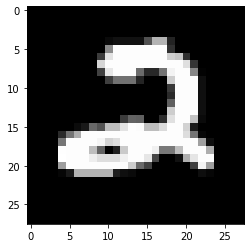

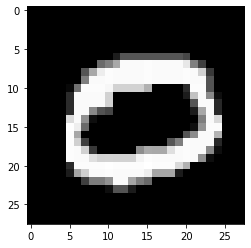

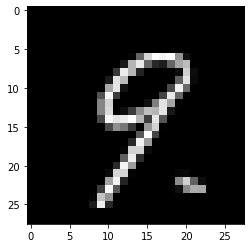

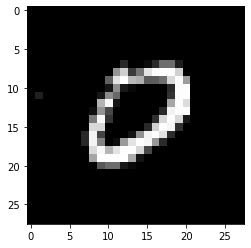

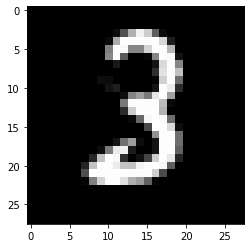

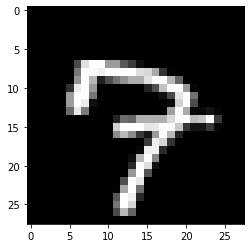

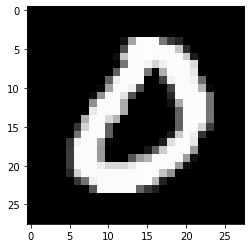

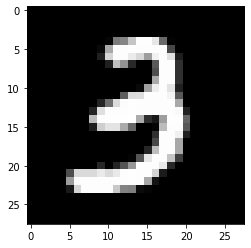

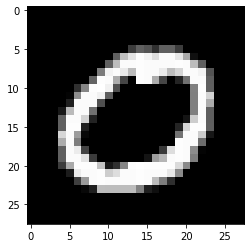

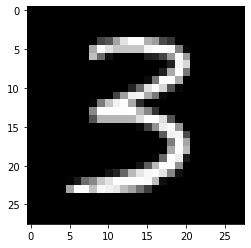

In [70]:
# Função para mostrar as imagens apenas para visualização
def mostrar_imagens(indice):
    imagem = X_teste[:, indice, None]
    imagem = imagem.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(imagem, interpolation='nearest')
    plt.show()

for i in range(10):
    mostrar_imagens(i)

In [71]:
# Implementação do algoritmo feedforward propagation

# Inicia os pesos e vieses com valores aleatórios
def montar_rede():
    W1 = np.random.rand(10, 784) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, W2, b1, b2

# Funções de ativação
def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    e = np.exp(Z)
    return e / e.sum(axis=0)
    
# Feedforward propagation
def forward_prop(W1, W2, b1, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [72]:
# Retorna a posição com a maior probabilidade encontrada pela rede neural
def previsao(A2):
    return np.argmax(A2, axis=0)

# Calcula o percentual de acerto da rede neural
def precisao(previsao, Y):
    return np.sum(previsao == Y) / Y.size

# Teste ajuste dos pesos de forma aleatória
def randomizar(X, Y, alpha, iteracoes):
    melhor_p = 0
    melhor_W1 = 0
    melhor_W2 = 0
    melhor_b1 = 0
    melhor_b2 = 0
    W1, W2, b1, b2 = montar_rede()
    for i in range(iteracoes):
        Z1, A1, Z2, A2 = forward_prop(W1, W2, b1, b2, X)
        previsoes = previsao(A2)
        p = precisao(previsoes, Y)
        if p > melhor_p:
            melhor_p = p
            melhor_W1 = W1
            melhor_W2 = W2
            melhor_b1 = b1
            melhor_b2 = b2
        W1, W2, b1, b2 = montar_rede()
        if i % 10 == 0:
            print("Iteração:", i)
            print("Precisão:", str(round(melhor_p*100,2))+"%")
    return melhor_W1, melhor_W2, melhor_b1, melhor_b2

In [30]:
W1, W2, b1, b2 = randomizar(X_treino, Y_treino, 0.1, 1000)

Iteração: 0
Precisão: 10.25%
Iteração: 10
Precisão: 13.98%
Iteração: 20
Precisão: 16.02%
Iteração: 30
Precisão: 16.02%
Iteração: 40
Precisão: 16.02%
Iteração: 50
Precisão: 16.02%
Iteração: 60
Precisão: 16.02%
Iteração: 70
Precisão: 16.59%
Iteração: 80
Precisão: 16.59%
Iteração: 90
Precisão: 16.59%
Iteração: 100
Precisão: 17.69%
Iteração: 110
Precisão: 17.69%
Iteração: 120
Precisão: 17.69%
Iteração: 130
Precisão: 17.69%
Iteração: 140
Precisão: 17.69%
Iteração: 150
Precisão: 17.72%
Iteração: 160
Precisão: 17.72%
Iteração: 170
Precisão: 17.72%
Iteração: 180
Precisão: 17.72%
Iteração: 190
Precisão: 17.72%
Iteração: 200
Precisão: 17.72%
Iteração: 210
Precisão: 17.72%
Iteração: 220
Precisão: 17.72%
Iteração: 230
Precisão: 17.72%
Iteração: 240
Precisão: 17.72%
Iteração: 250
Precisão: 17.72%
Iteração: 260
Precisão: 17.72%
Iteração: 270
Precisão: 17.72%
Iteração: 280
Precisão: 17.72%
Iteração: 290
Precisão: 17.72%
Iteração: 300
Precisão: 17.72%
Iteração: 310
Precisão: 17.72%
Iteração: 320
Preci

**Backward propagation**



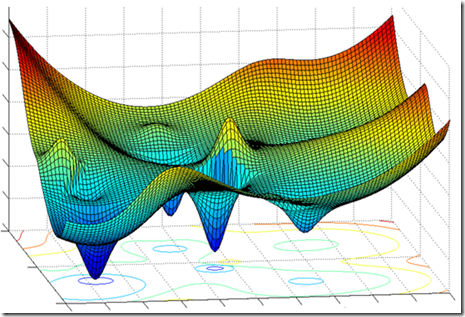

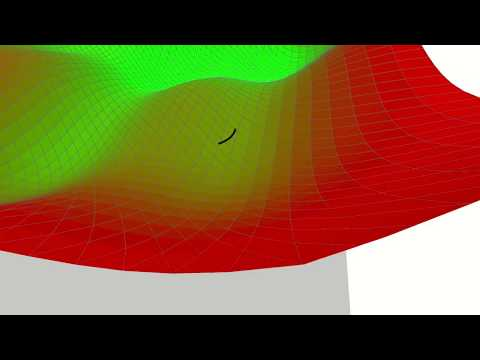

In [7]:
from IPython.display import YouTubeVideo

YouTubeVideo('GCvWD9zIF-s', width=800, height=300)

Text(0.5, 0, 'z')

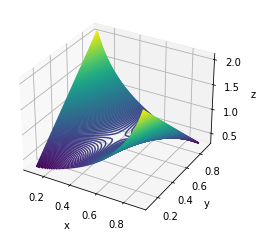

In [11]:
%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt


def f(x, y):
    return -y * np.log(x) - (1 - y) * np.log(1 - x)


x = np.linspace(0.1, 0.9)
y = np.linspace(0.1, 0.9)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 200, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Gradiente Descendente:

$$ W = W - \alpha * \frac{\partial L}{\partial W} $$

$$ B = B - \alpha * \frac{\partial L}{\partial B} $$

**Atualização dos pesos e vieses**

$$ W^{[2]} := W^{[2]} - \alpha \cdot \frac{\partial L}{\partial W^{[2]}} $$

$$ B^{[2]} := B^{[2]} - \alpha \cdot \frac{\partial L}{\partial B^{[2]}} $$

$$ W^{[1]} := W^{[1]} - \alpha \cdot \frac{\partial L}{\partial W^{[1]}} $$

$$ B^{[1]} := B^{[1]} - \alpha \cdot \frac{\partial L}{\partial B^{[1]}} $$
<br>

<br>
$$ \frac{\partial L}{\partial Z^{[2]}} = A^{[2]} - Y $$

$$ \frac{\partial L}{\partial W^{[2]}} = \frac{1}{m} \cdot \frac{\partial L}{\partial Z^{[2]}} \cdot A^{[1]T}$$

$$ \frac{\partial L}{\partial B^{[2]}} = \frac{1}{m} \cdot \sum \frac{\partial L}{\partial Z^{[2]}}$$

$$ \frac{\partial L}{\partial Z^{[1]}} = W^{[2]T} \cdot \frac{\partial L}{\partial Z^{[2]}} \odot ReLU^{[1]'}(Z^{[1]}) $$

$$ \frac{\partial L}{\partial W^{[1]}} = \frac{1}{m} \cdot \frac{\partial L}{\partial Z^{[1]}} \cdot X^{T} $$

$$ \frac{\partial L}{\partial B^{[1]}} = \frac{1}{m} \cdot \sum \frac{\partial L}{\partial Z^{[1]}} $$

------------------------------------------------------------------------------------------------------------------

**Derivação**

Primeiramente vamos relembrar as fórmulas para calcular os valores dos neurônios das camadas 1 e 2

$$ Z^{[1]} = W^{[1]} \cdot X + B^{[1]} $$

$$ A^{[1]} = ReLU(Z^{[1]}) $$

$$ Z^{[2]} = W^{[2]} \cdot A^{[1]} + B^{[2]} $$

$$ A^{[2]} = softmax(Z^{[2]}) $$

Repare que as funções estão uma dentro da outra, $ A^{[2]} $ depende de $ Z^{[2]} $ que depende de $ A^{[1]} $ que depende de $ Z^{[1]} $.

$$ A^{[2]} = softmax(W^{[2]} \cdot (ReLU(W^{[1]} \cdot X + B^{[1]}) + B^{[2]}) $$

Portanto para chegar nas derivadas parciais do custo $L$ em relação aos pesos e vieses preciso utilizar a "Regra da Cadeia".

$$ \frac{\partial L}{\partial W^{[2]}} = \frac{\partial L}{\partial A^{[2]}} \frac{\partial A^{[2]}}{\partial Z^{[2]}} \frac{\partial Z^{[2]}}{\partial W^{[2]}} $$
<br>
$$ \frac{\partial L}{\partial W^{[1]}} =  \frac{\partial L}{\partial A^{[2]}} \frac{\partial A^{[2]}}{\partial Z^{[2]}} \frac{\partial Z^{[2]}}{\partial A^{[1]}} \frac{\partial A^{[1]}}{\partial Z^{[1]}} \frac{\partial Z^{[1]}}{\partial W^{[1]}} $$
<br>
$$ \frac{\partial L}{\partial B^{[2]}} = \frac{\partial L}{\partial A^{[2]}} \frac{\partial A^{[2]}}{\partial Z^{[2]}} \frac{\partial Z^{[2]}}{\partial B^{[2]}} $$
<br>
$$ \frac{\partial L}{\partial B^{[1]}} = \frac{\partial L}{\partial A^{[2]}} \frac{\partial A^{[2]}}{\partial Z^{[2]}} \frac{\partial Z^{[2]}}{\partial A^{[1]}} \frac{\partial A^{[1]}}{\partial Z^{[1]}} \frac{\partial Z^{[1]}}{\partial B^{[1]}} $$

Agora repare que a expressão $ \frac{\partial L}{\partial A^{[2]}} \frac{\partial A^{[2]}}{\partial Z^{[2]}} $ se repete no início de cada derivada. Trata-se da derivada da função de custo em relação a $ Z^{[2]} $ passando pela função de ativação softmax $ A^{[2]} $ que pode ser escrita da seguinte forma:

$$ softmax(Z^{[2]}) = A^{[2]}(Z^{[2]}) = \frac{e^{Z^{[2]}_i}}{\sum \limits _{l=1} ^{n} e^{Z^{[2]}_l}} $$

Primeiramente vamos encontrar a derivada $\frac{\partial A^{[2]}}{\partial Z^{[2]}}$ aplicando o seguinte truque:

$$ \frac{\partial}{\partial Z^{[2]}_j} log(A^{[2]}_i) = \frac{1}{A^{[2]}_i} \cdot \frac{\partial A^{[2]}_i}{\partial Z^{[2]}_j} $$

O truque é em vez de obter a derivada parcial da saída nos calculamos a derivada parcial do logarítmo da saída (também chamada derivada logarítmica). Onde $log$ trata-se do "logarítmo natural" ou "logaritmo neperiano" que pode ser escrito como $ln$.

Ao arrumar a fórmula nós obtemos a seguinte derivada:

$$ \frac{\partial A^{[2]}_i}{\partial Z^{[2]}_j} = A^{[2]}_i \cdot \frac{\partial}{\partial Z^{[2]}_j} log(A^{[2]}_i) $$

Agora precisamos calcular $ \frac{\partial}{\partial Z^{[2]}_j} log(A^{[2]}_i) $, onde $ log(A^{[2]}_i) $ é dado por:

Aqui é importante lembrar da propriedade do logaritmo de um quociente.

$$ log(A^{[2]}_i) = log\Bigg(\frac{e^{Z^{[2]}_i}}{\sum \limits _{l=1} ^{n} e^{Z^{[2]}_l}} \Bigg) = Z^{[2]}_i - log\Bigg(\sum \limits _{l=1} ^{n} e^{Z^{[2]}_l} \Bigg) $$

Com isso $ \frac{\partial}{\partial Z^{[2]}_j} log(A^{[2]}_i) $ vai ser:

$$ \frac{\partial}{\partial Z^{[2]}_j} log(A^{[2]}_i) = \frac{\partial Z^{[2]}_i}{\partial Z^{[2]}_j} - \frac{\partial}{\partial Z^{[2]}_j} log\Bigg(\sum \limits _{l=1} ^{n} e^{Z^{[2]}_l}\Bigg) $$

Dando uma olhada no termo $ \frac{\partial Z^{[2]}_i}{\partial Z^{[2]}_j} $ quando i = j o resultado é 1 pois vai se tratar da mesma variável, do contrário o valor é 0 pois a função a ser derivada funcionará como uma constante.

$$ \frac{\partial z_i}{\partial z_j} = \begin{cases} 1 & i = j \\ 0 & i \ne j \end{cases} $$

Nós podemos reescrever essa equação como $ 1\{i = j\} $.

Depois o termo $ \frac{\partial}{\partial Z^{[2]}_j} log\Bigg(\sum \limits _{l=1} ^{n} e^{Z^{[2]}}_l \Bigg) $ pode ser resolvido pela regra da cadeia. Com isso o resultado da derivada fica assim:

$$ \frac{\partial}{\partial Z^{[2]}_j} log(A^{[2]}_i) = 1\{i = j\} - \frac{1}{\sum \limits _{l=1} ^{n} e^{Z^{[2]}_l}} \cdot \Bigg(\frac{\partial}{\partial Z^{[2]}_j} \sum \limits _{l=1} ^{n} e^{Z^{[2]}_l} \Bigg) $$

Agora vamos calcular o termo $\frac{\partial}{\partial Z^{[2]}_j} \sum \limits _{l=1} ^{n} e^{Z^{[2]}_l}$

$$ \frac{\partial}{\partial Z^{[2]}_j} \sum \limits _{l=1} ^{n} e^{Z^{[2]}_l} = \frac{\partial}{\partial Z^{[2]}_j} [e^{Z^{[2]}_1} + e^{Z^{[2]}_2} + ... + e^{Z^{[2]}_j} + ... + e^{Z^{[2]}_n}] = \frac{\partial}{\partial Z^{[2]}_j} [e^{Z^{[2]}_j}] = e^{Z^{[2]}_j} $$

Substituindo na derivada e simplificando temos:

$$ \frac{\partial}{\partial Z^{[2]}_j} log(A^{[2]}_i) = 1\{i = j\} - \frac{e^{Z^{[2]}_j}}{\sum \limits _{l=1} ^{n} e^{Z^{[2]}_l}} = 1\{i = j\} - A^{[2]}_j $$

Agora com $\frac{\partial}{\partial Z^{[2]}_j} log(A^{[2]}_i)$ calculado podemos substituir na equação:

$$ \frac{\partial A^{[2]}_i}{\partial Z^{[2]}_j} = A^{[2]}_i \cdot \frac{\partial}{\partial Z^{[2]}_j} log(A^{[2]}_i) = A^{[2]}_i \cdot (1\{i = j\} - A^{[2]}_j) $$

Com isso temos o 2º termo $\frac{\partial A^{[2]}}{\partial Z^{[2]}}$ calculado. Vamos partir para o outro termo que é $\frac{\partial L}{\partial A^{[2]}}$.

Primeiramente vamos definir $L$ que é a nossa função de custo (a letra L é devido ao nome em inglês *loss*).

$$ L(Y, A^{[2]}) = - \sum \limits _{i=1} ^{c} Y_i \cdot log(A^{[2]}_i) $$

A função utilizada no caso é a Perda de Entropia Cruzada Categórica (*Categorical Cross-Entropy Loss*), onde $Y$ são os valores corretos que mostramos para a rede neural para que ela aprenda.

As funções de custo para problemas de classificação são diferentes das de problemas de regressão, a perda de entropia cruzada é utilizada para o primeiro tipo, pois durante a fase de treinamento a distribuição de probabilidade prevista deve tender para a distribuição de probabilidade real. Se a distribuição de probabilidade prevista não for mais próxima da real, o modelo deve ajustar seu peso. A entropia cruzada no caso serve para calcular a distância entre a distribuição de probabilidade prevista e a real.

Podemos escrever a derivada parcial de $L$ em relação a $Z^{[2]}$ como:

$$ \frac{\partial L}{\partial Z^{[2]}_j} = - \frac{\partial}{\partial Z^{[2]}_j} \sum \limits _{i=1} ^{c} Y_i \cdot log(A^{[2]}_i) = - \sum \limits _{i=1} ^{c} Y_i \cdot \frac{\partial}{\partial Z^{[2]}_j} log(A^{[2]}_i) = - \sum \limits _{i=1} ^{c} \frac{Y_i}{A^{[2]}_i} \cdot \frac{\partial A^{[2]}_i}{\partial Z^{[2]}_j} $$

$$ \frac{\partial L}{\partial Z^{[2]}_j} = - \sum \limits _{i=1} ^{c} \frac{Y_i}{A^{[2]}_i} \cdot A^{[2]}_i \cdot (1\{i = j\} - A^{[2]}_j) = - \sum \limits _{i=1} ^{c} Y_i \cdot (1\{i = j\} - A^{[2]}_j) $$

Aqui pode-se ver que obtemos novamente os termos $\frac{\partial}{\partial Z^{[2]}_j} log(A^{[2]}_i)$ e $\frac{\partial A^{[2]}_i}{\partial Z^{[2]}_j}$ que foram calculados previamente, portanto basta substituir na fórmula e simplificar a equação.

Agora continuando a simplificação vamos aplicar a propriedade distributiva para multiplicar o ultimo termo da equação.

$$ \frac{\partial L}{\partial Z^{[2]}_j} = \sum \limits _{i=1} ^{c} Y_i \cdot A^{[2]}_j - \sum \limits _{i=1} ^{c} Y_i \cdot 1\{i = j\} $$

Como para $1\{i = j\}$ é igual a 1 quando i = j então ficamos apenas com $Y_j$

$$ \frac{\partial L}{\partial Z^{[2]}_j} = \sum \limits _{i=1} ^{c} Y_i \cdot A^{[2]}_j - Y_j $$

Agora tiramos para fora do somatório o termo $A^{[2]}_j$ já que ele não depende do índice i.

$$ \frac{\partial L}{\partial Z^{[2]}_j} = A^{[2]}_j \cdot \sum \limits _{i=1} ^{c} Y_i - Y_j = A^{[2]}_j - Y_j $$

Depois nós nos atentamos para o fato de que cada coluna da matriz $Y$ tem soma igual a 1, com isso $A^{[2]}_j x 1 = A^{[2]}_j$.

Com isso finalmente encontramos a primeira derivada da nossa lista.

$$ \frac{\partial L}{\partial Z^{[2]}} = A^{[2]} - Y $$

Para melhor entendimento vamos reescrever as derivadas da seguinte forma:

$$ \frac{\partial L}{\partial W^{[2]}} = \frac{\partial L^{[2]}}{\partial Z^{[2]}} \frac{\partial Z^{[2]}}{\partial W^{[2]}} $$
<br>
$$ \frac{\partial L}{\partial W^{[1]}} =  \frac{\partial L^{[2]}}{\partial Z^{[2]}} \frac{\partial Z^{[2]}}{\partial A^{[1]}} \frac{\partial A^{[1]}}{\partial Z^{[1]}} \frac{\partial Z^{[1]}}{\partial W^{[1]}} $$
<br>
$$ \frac{\partial L}{\partial B^{[2]}} = \frac{\partial L^{[2]}}{\partial Z^{[2]}} \frac{\partial Z^{[2]}}{\partial B^{[2]}} $$
<br>
$$ \frac{\partial L}{\partial B^{[1]}} = \frac{\partial L^{[2]}}{\partial Z^{[2]}} \frac{\partial Z^{[2]}}{\partial A^{[1]}} \frac{\partial A^{[1]}}{\partial Z^{[1]}} \frac{\partial Z^{[1]}}{\partial B^{[1]}} $$

Agora substituindo pelo valor que calculamos:

$$ \frac{\partial L}{\partial W^{[2]}} = (A^{[2]} - Y) \frac{\partial Z^{[2]}}{\partial W^{[2]}} $$
<br>
$$ \frac{\partial L}{\partial W^{[1]}} =  (A^{[2]} - Y) \frac{\partial Z^{[2]}}{\partial A^{[1]}} \frac{\partial A^{[1]}}{\partial Z^{[1]}} \frac{\partial Z^{[1]}}{\partial W^{[1]}} $$
<br>
$$ \frac{\partial L}{\partial B^{[2]}} = (A^{[2]} - Y) \frac{\partial Z^{[2]}}{\partial B^{[2]}} $$
<br>
$$ \frac{\partial L}{\partial B^{[1]}} = (A^{[2]} - Y) \frac{\partial Z^{[2]}}{\partial A^{[1]}} \frac{\partial A^{[1]}}{\partial Z^{[1]}} \frac{\partial Z^{[1]}}{\partial B^{[1]}} $$

Agora vamos resolver as derivadas $\frac{\partial L}{\partial W^{[2]}}$ e $\frac{\partial L}{\partial B^{[2]}}$.

Para isso temos que resolver $\frac{\partial Z^{[2]}}{\partial W^{[2]}}$ e $\frac{\partial Z^{[2]}}{\partial B^{[2]}}$.

Relembrando que $Z^{[2]}$ é:

$$ Z^{[2]} = W^{[2]} \cdot A^{[1]} + B^{[2]} $$

Derivando em relação a $W^{[2]}$ e $B^{[2]}$ respectivamente temos:

$$ \frac{\partial Z^{[2]}}{\partial W^{[2]}} = A^{[1]} $$

$$ \frac{\partial Z^{[2]}}{\partial B^{[2]}} = 1 $$

Portanto:

$$ \frac{\partial L}{\partial W^{[2]}} = (A^{[2]} - Y) \cdot A^{[2]} $$
$$ \frac{\partial L}{\partial B^{[2]}} = (A^{[2]} - Y) $$

Como estamos retropropagando o erro de várias amostras vamos dividir o resultado por $m$ que é a quantidade de amostras que nós temos, além disso para fazer a multiplicação de matrizes temos de transpor a matriz $A^{[2]}$ e para atualizar os vieses da camada 2 temos de somar a matriz de derivadas $\frac{\partial L}{\partial Z^{[2]}}$ e dividir pelo número de amostras.

$$ \frac{\partial L}{\partial Z^{[2]}} = A^{[2]} - Y $$

$$ \frac{\partial L}{\partial W^{[2]}} = \frac{1}{m} \cdot \frac{\partial L}{\partial Z^{[2]}} \cdot A^{[1]T} $$

$$ \frac{\partial L}{\partial B^{[2]}} = \frac{1}{m} \cdot \sum \frac{\partial L}{\partial Z^{[2]}} $$

Por último faltam resolver as derivadas $\frac{\partial L}{\partial W^{[1]}}$ e $\frac{\partial L}{\partial B^{[1]}}$.

Mas vamos por partes, primeiramente resolveremos a derivada $\frac{\partial L}{\partial Z^{[1]}}$:

$$ \frac{\partial L}{\partial W^{[1]}} =  (A^{[2]} - Y) \frac{\partial Z^{[2]}}{\partial A^{[1]}} \frac{\partial A^{[1]}}{\partial Z^{[1]}} \frac{\partial Z^{[1]}}{\partial W^{[1]}} $$

$$ \frac{\partial L}{\partial B^{[1]}} = (A^{[2]} - Y) \frac{\partial Z^{[2]}}{\partial A^{[1]}} \frac{\partial A^{[1]}}{\partial Z^{[1]}} \frac{\partial Z^{[1]}}{\partial B^{[1]}} $$

Onde:

$$ \frac{\partial L}{\partial Z^{[1]}} = (A^{[2]} - Y) \frac{\partial Z^{[2]}}{\partial A^{[1]}} \frac{\partial A^{[1]}}{\partial Z^{[1]}} $$

Ao derivar $Z^{[2]}$ em relação a $A^{[1]}$ ficamos com $W^{[2]}$ e a derivada de $A^{[1]}$ nada mais é que a derivada de nossa função de ativação ReLU (*Rectified Linear Units*) em relação a $Z^{[1]}$

$$ Z^{[2]} = W^{[2]} \cdot A^{[1]} + B^{[2]} $$

$$ \frac{\partial Z^{[2]}}{\partial A^{[1]}} = W^{[2]} $$

$$ \frac{\partial A^{[1]}}{\partial Z^{[1]}} = ReLU^{[1]'}(Z^{[1]}) $$

Onde:

$$ ReLU'(Z) = \begin{cases} 1 & Z > 0 \\ 0 & Z \le 0 \end{cases} $$

Ao substituir os valores na equação obtemos:

$$ \frac{\partial L}{\partial Z^{[1]}} = (A^{[2]} - Y) \times W^{[2]} \times ReLU^{[1]'}(Z^{[1]}) $$

$$ \frac{\partial L}{\partial Z^{[2]}} = A^{[2]} - Y $$

$$ \frac{\partial L}{\partial Z^{[1]}} = W^{[2]T} \cdot \frac{\partial L}{\partial Z^{[2]}} \odot ReLU^{[1]'}(Z^{[1]}) $$

Aqui fazemos a transposta da matriz $W^{[2]}$ para multiplicação matricial com $ \frac{\partial L}{\partial Z^{[2]}} $ e fazemos o produto hadamard com a matriz da derivada $ReLU^{[1]'}(Z^{[1]})$

Agora que encontramos $\frac{\partial L}{\partial Z^{[1]}}$ podemos substituir as derivadas

$$ \frac{\partial L}{\partial W^{[1]}} =  (A^{[2]} - Y) \frac{\partial Z^{[2]}}{\partial A^{[1]}} \frac{\partial A^{[1]}}{\partial Z^{[1]}} \frac{\partial Z^{[1]}}{\partial W^{[1]}} $$

$$ \frac{\partial L}{\partial B^{[1]}} = (A^{[2]} - Y) \frac{\partial Z^{[2]}}{\partial A^{[1]}} \frac{\partial A^{[1]}}{\partial Z^{[1]}} \frac{\partial Z^{[1]}}{\partial B^{[1]}} $$

<br>

$$ \frac{\partial L}{\partial W^{[1]}} =  (A^{[2]} - Y) \frac{\partial L}{\partial Z^{[1]}} \frac{\partial Z^{[1]}}{\partial W^{[1]}} $$

$$ \frac{\partial L}{\partial B^{[1]}} = (A^{[2]} - Y) \frac{\partial L}{\partial Z^{[1]}} \frac{\partial Z^{[1]}}{\partial B^{[1]}} $$

Onde:

$$ \frac{\partial L}{\partial Z^{[2]}} = A^{[2]} - Y $$

$$ \frac{\partial L}{\partial W^{[1]}} =  (A^{[2]} - Y) \frac{\partial L}{\partial Z^{[1]}} \frac{\partial Z^{[1]}}{\partial W^{[1]}} $$

$$ \frac{\partial L}{\partial B^{[1]}} = (A^{[2]} - Y) \frac{\partial L}{\partial Z^{[1]}} \frac{\partial Z^{[1]}}{\partial B^{[1]}} $$

$$ \frac{\partial L}{\partial W^{[1]}} = W^{[2]T} \cdot \frac{\partial L}{\partial Z^{[2]}} \odot ReLU^{[1]'}(Z^{[1]}) \cdot \frac{\partial Z^{[1]}}{\partial W^{[1]}} $$

$$ \frac{\partial L}{\partial B^{[1]}} = W^{[2]T} \cdot \frac{\partial L}{\partial Z^{[2]}} \odot ReLU^{[1]'}(Z^{[1]}) \cdot \frac{\partial Z^{[1]}}{\partial B^{[1]}} $$

Para terminar vamos resolver as derivadas $\frac{\partial Z^{[1]}}{\partial W^{[1]}}$ e $\frac{\partial Z^{[1]}}{\partial B^{[1]}}$.

Relembrando $Z^{[1]}$ temos:

$$ Z^{[1]} = W^{[1]} \cdot X + B^{[1]} $$

Deve-se derivar parcialmente $Z^{[1]}$ em relação a $W^{[1]}$ e $B^{[1]}$ respectivamente:

$$ \frac{\partial Z^{[1]}}{\partial W^{[1]}} = X $$

$$ \frac{\partial Z^{[1]}}{\partial B^{[1]}} = 1 $$

Substituindo nas equações temos:

$$ \frac{\partial L}{\partial W^{[1]}} = W^{[2]T} \cdot \frac{\partial L}{\partial Z^{[2]}} \odot ReLU^{[1]'}(Z^{[1]}) \cdot X $$

$$ \frac{\partial L}{\partial B^{[1]}} = W^{[2]T} \cdot \frac{\partial L}{\partial Z^{[2]}} \odot ReLU^{[1]'}(Z^{[1]}) $$

Por fim vamos reescrever da seguinte forma:

$$ \frac{\partial L}{\partial Z^{[1]}} = W^{[2]T} \cdot \frac{\partial L}{\partial Z^{[2]}} \odot ReLU^{[1]'}(Z^{[1]}) $$

$$ \frac{\partial L}{\partial W^{[1]}} = \frac{1}{m} \cdot \frac{\partial L}{\partial Z^{[1]}} \cdot X^{T} $$

$$ \frac{\partial L}{\partial B^{[1]}} = \frac{1}{m} \cdot \sum \frac{\partial L}{\partial Z^{[1]}} $$

Aqui aplicamos a mesma ideia de dividir as derivadas pelo número de amostras $m$, transpor a matriz de entrada $X$ e realizar o somatório de $\frac{\partial L}{\partial Z^{[1]}}$.

Com isso finalizamos nossa lista de derivadas parciais que servirão para atualizar os pesos e vieses de nossa rede neural.

$$ \frac{\partial L}{\partial Z^{[2]}} = A^{[2]} - Y $$

$$ \frac{\partial L}{\partial W^{[2]}} = \frac{1}{m} \cdot \frac{\partial L}{\partial Z^{[2]}} \cdot A^{[1]T}$$

$$ \frac{\partial L}{\partial B^{[2]}} = \frac{1}{m} \cdot \sum \frac{\partial L}{\partial Z^{[2]}}$$

$$ \frac{\partial L}{\partial Z^{[1]}} = W^{[2]T} \cdot \frac{\partial L}{\partial Z^{[2]}} \odot ReLU^{[1]'}(Z^{[1]}) $$

$$ \frac{\partial L}{\partial W^{[1]}} = \frac{1}{m} \cdot \frac{\partial L}{\partial Z^{[1]}} \cdot X^{T} $$

$$ \frac{\partial L}{\partial B^{[1]}} = \frac{1}{m} \cdot \sum \frac{\partial L}{\partial Z^{[1]}} $$

In [73]:
# Implementação backpropagation



# Cria uma matriz específica com zeros e uns nas posições do valor correto que a rede neural deve adivinhar
# As posições em um array são indexadas a partir de 0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# Exemplo: o array [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], eu sei que a resposta correta é 7 pois o 1 está na posição 7
# E assim para todas as amostras
def respostas(Y):
    resp = np.zeros((Y.size, Y.max()+1))
    resp[np.arange(Y.size), Y] = 1
    resp = resp.T
    return resp


# Derivada da função de ativação ReLU
def ReLU_deriv(Z):
    return Z > 0

# Backpropagation
def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    resp_Y = respostas(Y)
    dZ2 = A2 - resp_Y
    dW2 = 1 / c_treino * dZ2.dot(A1.T)
    db2 = 1 / c_treino * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / c_treino * dZ1.dot(X.T)
    db1 = 1 / c_treino * np.sum(dZ1)
    return db2, db1, dW1, dW2

# Atualização dos pesos atraves do gradiente descendente
def atualiza_pesos(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha):
    W1 = W1 - alpha * dW1
    W2 = W2 - alpha * dW2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2
    return W1, W2, b1, b2

In [74]:
def gradiente(X, Y, alpha, iteracoes):
    W1, W2, b1, b2 = montar_rede()
    for i in range(iteracoes):
        Z1, A1, Z2, A2 = forward_prop(W1, W2, b1, b2, X)
        db2, db1, dW1, dW2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, W2, b1, b2 = atualiza_pesos(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha)
        if i % 10 == 0:
            print("Iterações:", i)
            previsoes = previsao(A2)
            print("Precisão:", str(round(precisao(previsoes, Y) * 100, 2)) + "%")
    return W1, W2, b1, b2

In [33]:
W1, W2, b1, b2 = gradiente(X_treino, Y_treino, 0.1, 1000)

Iterações: 0
Precisão: 9.13%
Iterações: 10
Precisão: 24.12%
Iterações: 20
Precisão: 30.92%
Iterações: 30
Precisão: 36.66%
Iterações: 40
Precisão: 41.49%
Iterações: 50
Precisão: 45.77%
Iterações: 60
Precisão: 49.66%
Iterações: 70
Precisão: 53.67%
Iterações: 80
Precisão: 57.43%
Iterações: 90
Precisão: 60.76%
Iterações: 100
Precisão: 63.02%
Iterações: 110
Precisão: 64.79%
Iterações: 120
Precisão: 66.19%
Iterações: 130
Precisão: 67.5%
Iterações: 140
Precisão: 68.65%
Iterações: 150
Precisão: 69.7%
Iterações: 160
Precisão: 70.5%
Iterações: 170
Precisão: 71.34%
Iterações: 180
Precisão: 72.14%
Iterações: 190
Precisão: 72.83%
Iterações: 200
Precisão: 73.4%
Iterações: 210
Precisão: 74.03%
Iterações: 220
Precisão: 74.58%
Iterações: 230
Precisão: 75.08%
Iterações: 240
Precisão: 75.55%
Iterações: 250
Precisão: 76.03%
Iterações: 260
Precisão: 76.49%
Iterações: 270
Precisão: 76.94%
Iterações: 280
Precisão: 77.36%
Iterações: 290
Precisão: 77.69%
Iterações: 300
Precisão: 78.05%
Iterações: 310
Precisão:

In [75]:
# Testar a rede neural
def fazer_previsoes(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, W2, b1, b2, X)
    previsoes = previsao(A2)
    return previsoes

def teste(indice, W1, b1, W2, b2, X, Y, imprime=True):
    imagem_atual = X[:, indice, None]
    previsao = fazer_previsoes(imagem_atual, W1, b1, W2, b2)
    resposta = Y[indice]
    if imprime:
        print('Previsão:', previsao)
        print('Resposta:', resposta)

        imagem_atual = imagem_atual.reshape((28, 28)) * 255
        plt.gray()
        plt.imshow(imagem_atual, interpolation='nearest')
        plt.show()
    
    return previsao[0], resposta

Previsão: [7]
Resposta: 9


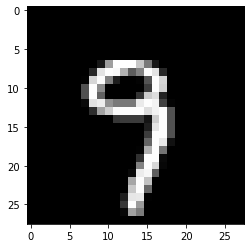

Previsão: [9]
Resposta: 9


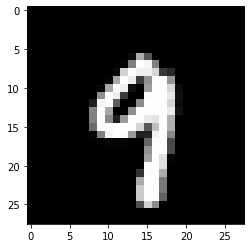

Previsão: [8]
Resposta: 8


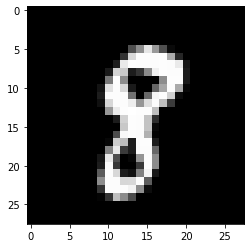

Previsão: [2]
Resposta: 2


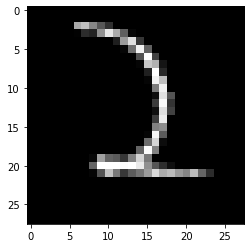

Previsão: [4]
Resposta: 4


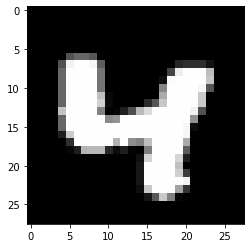

In [76]:
# Testes com 5 dígitos aleatórios
from random import randint

for i in range(5):
    teste(randint(0,999), W1, b1, W2, b2, X_treino, Y_treino)

In [77]:
# Testes para verificar a precisão da rede neural
testes = np.array([teste(i, W1, b1, W2, b2, X_treino, Y_treino, False) for i in range(c_treino)])
prev = testes[:, 0]
resp = testes[:, 1]

acerto_total = np.sum(prev==resp)/resp.size

print(f'Percentual de acerto: {round(acerto_total * 100, 2)}%')

Percentual de acerto: 87.51%


In [84]:
# Cria a tabela com os resultados para depois ser gerado o csv que será submetido
resultados = np.array([teste(i, W1, b1, W2, b2, X_teste, Y_treino, False)[0] for i in range(c_teste)])

resultados = pd.Series(resultados, name='Label')

resultados = pd.concat([pd.Series(range(1,c_teste+1), name = 'ImageId'), resultados], axis = 1)

resultados

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [85]:
# Salvar a resposta obtida em csv
resultados.to_csv('submission.csv', index=False)